In [1]:
import pandas as pd
import pylab
import scipy.stats as stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("gestures.csv")


In [3]:
df.head()     # Display the first few rows of the dataset

,time,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z,label
0,2023-06-08 16:44:56.020,0.0117,0.0169,0.9767,0.0000,0.00000,0.0000,0.025950,-0.003650,-0.130100,0.00,0.00,0.00,0.000000,0.000000,0.00000,rest
1,2023-06-08 16:44:56.040,0.0117,0.0169,0.9767,0.0000,0.00000,0.0000,0.051900,-0.007300,-0.260200,176.22,78.18,-24.72,0.000000,0.000000,0.00000,rest
2,2023-06-08 16:44:56.060,0.0171,0.0222,0.9760,-0.0021,-0.00270,-0.1189,0.051900,-0.007300,-0.260200,176.22,78.18,-24.72,261.352275,-0.978525,0.75285,rest
3,2023-06-08 16:44:56.080,0.0171,0.0222,0.9760,-0.0042,-0.00540,-0.2378,0.051900,-0.007300,-0.260200,179.88,80.88,-28.08,348.469700,-1.304700,1.00380,rest
4,2023-06-08 16:44:56.100,0.0193,0.0198,0.9762,0.0018,-0.01195,-0.2366,0.036475,-0.007625,-0.196225,179.88,80.88,-28.08,318.916325,-1.257000,1.04580,rest


In [4]:
df.isnull().sum()

time        0
gfc_x    4736
gfc_y    4736
gfc_z    4736
acc_x    4736
acc_y    4736
acc_z    4736
gyr_x    4736
gyr_y    4736
gyr_z    4736
mag_x    4736
mag_y    4736
mag_z    4736
inc_x    4736
inc_y    4736
inc_z    4736
label    4736
dtype: int64

In [19]:
def calculate_statistics(df):
    column_names = {
        "gfc_x": "G-Force X",
        "gfc_y": "G-Force Y",
        "gfc_z": "G-Force Z",
        "acc_x": "Acceleration X",
        "acc_y": "Acceleration Y",
        "acc_z": "Acceleration Z",
        "gyr_x": "Angular Velocity X",
        "gyr_y": "Angular Velocity Y",
        "gyr_z": "Angular Velocity Z",
        "mag_x": "Magnetic Field X",
        "mag_y": "Magnetic Field Y",
        "mag_z": "Magnetic Field Z",
        "inc_x": "Inclination X",
        "inc_y": "Inclination Y",
        "inc_z": "Inclination Z"
    }

    mean = [df[col].mean() for col in df.columns[1:-1]]
    median = [df[col].median() for col in df.columns[1:-1]]
    max_val = [df[col].max() for col in df.columns[1:-1]]
    min_val = [df[col].min() for col in df.columns[1:-1]]
    range_val = np.subtract(max_val, min_val)
    std = [df[col].std() for col in df.columns[1:-1]]  # Calculate standard deviation
    null_count = [df[col].isnull().sum() for col in df.columns[1:-1]]  # Count null values
    temp=df.dropna()
    shapiro = [stats.shapiro(temp[col])[0] for col in df.columns[1:-1]]

    stats_df = pd.DataFrame(
        {
            "Mean": mean,
            "Median": median,
            "Max": max_val,
            "Min": min_val,
            "Range": range_val,
            "Std": std,  # Add standard deviation
            "NaN": null_count,  # Add null value count
            "Shapiro": shapiro
        },
        index=[column_names[col] for col in df.columns[1:-1]]
    )

    return stats_df

stats_df = calculate_statistics(df)
stats_df


,Mean,Median,Max,Min,Range,Std,NaN,Shapiro
G-Force X,-0.002271,0.01420,6.4463,-4.9440,11.3903,0.897396,4736,0.938901
G-Force Y,0.418555,0.41390,3.0927,-1.8108,4.9035,0.398154,4736,0.971403
G-Force Z,0.227461,0.14850,7.9522,-5.3999,13.3521,0.891075,4736,0.870904
Acceleration X,0.605877,0.02520,56.8826,-36.9371,93.8197,6.638013,4736,0.911822
Acceleration Y,-0.983866,-0.17910,23.1357,-24.1496,47.2853,2.788657,4736,0.936210
Acceleration Z,0.179770,-0.18640,80.5654,-49.4844,130.0498,6.492441,4736,0.714186
Angular Velocity X,0.006872,-0.00165,14.5630,-14.7438,29.3068,1.912251,4736,0.829356
Angular Velocity Y,0.009117,0.00120,11.9290,-11.7345,23.6635,0.804959,4736,0.896121
Angular Velocity Z,-0.008356,-0.00310,8.1770,-8.4886,16.6656,1.578620,4736,0.939647
Magnetic Field X,38.795092,9.87000,212.6400,-187.6800,400.3200,80.988901,4736,0.716948


In [6]:
print(df.shape)
print(df['label'].unique())


(294699, 17)
['rest' 'clap' nan 'handshake' 'high five' 'wave']


In [7]:
stats_table_latex = stats_df.to_latex(
    column_format='lcccccccc',  # Adjust the column formatting as needed
    caption='Statistics Table',  # Add a caption for the table
    label='tab:statistics'  # Add a label for cross-referencing
)

print(stats_table_latex)

\begin{table}
\centering
\caption{Statistics Table}
\label{tab:statistics}
\begin{tabular}{lcccccccc}
\toprule
{} &        Mean &     Median &       Max &       Min &     Range &         Std &   NaN &   Shapiro \\
\midrule
G-Force X          &   -0.002271 &    0.01420 &    6.4463 &   -4.9440 &   11.3903 &    0.897396 &  4736 &  0.938901 \\
G-Force Y          &    0.418555 &    0.41390 &    3.0927 &   -1.8108 &    4.9035 &    0.398154 &  4736 &  0.971403 \\
G-Force Z          &    0.227461 &    0.14850 &    7.9522 &   -5.3999 &   13.3521 &    0.891075 &  4736 &  0.870904 \\
Acceleration X     &    0.605877 &    0.02520 &   56.8826 &  -36.9371 &   93.8197 &    6.638013 &  4736 &  0.911822 \\
Acceleration Y     &   -0.983866 &   -0.17910 &   23.1357 &  -24.1496 &   47.2853 &    2.788657 &  4736 &  0.936210 \\
Acceleration Z     &    0.179770 &   -0.18640 &   80.5654 &  -49.4844 &  130.0498 &    6.492441 &  4736 &  0.714186 \\
Angular Velocity X &    0.006872 &   -0.00165 &   14.5630 &  -1

In [8]:
df.info()     # Get information about the dataset, including data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294699 entries, 0 to 294698
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    294699 non-null  object 
 1   gfc_x   289963 non-null  float64
 2   gfc_y   289963 non-null  float64
 3   gfc_z   289963 non-null  float64
 4   acc_x   289963 non-null  float64
 5   acc_y   289963 non-null  float64
 6   acc_z   289963 non-null  float64
 7   gyr_x   289963 non-null  float64
 8   gyr_y   289963 non-null  float64
 9   gyr_z   289963 non-null  float64
 10  mag_x   289963 non-null  float64
 11  mag_y   289963 non-null  float64
 12  mag_z   289963 non-null  float64
 13  inc_x   289963 non-null  float64
 14  inc_y   289963 non-null  float64
 15  inc_z   289963 non-null  float64
 16  label   289963 non-null  object 
dtypes: float64(15), object(2)
memory usage: 38.2+ MB


In [9]:
df.describe()   # Summary


,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z
count,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000,289963.000000
mean,-0.002271,0.418555,0.227461,0.605877,-0.983866,0.179770,0.006872,0.009117,-0.008356,38.795092,0.754177,-1.042675,155.849428,-65.159410,-5.897247
std,0.897396,0.398154,0.891075,6.638013,2.788657,6.492441,1.912251,0.804959,1.578620,80.988901,37.761870,13.961867,109.110491,61.328673,48.700114
min,-4.944000,-1.810800,-5.399900,-36.937100,-24.149600,-49.484400,-14.743800,-11.734500,-8.488600,-187.680000,-124.200000,-102.420000,0.000000,-179.992800,-89.999200
25%,-0.355200,0.022500,-0.235500,-1.226510,-2.520900,-1.595040,-0.378700,-0.283647,-0.531500,-15.210000,-23.364000,-10.540000,62.136800,-119.688680,-29.433550
50%,0.014200,0.413900,0.148500,0.025200,-0.179100,-0.186400,-0.001650,0.001200,-0.003100,9.870000,-14.400000,1.452000,128.372150,-58.957500,0.734800
75%,0.343000,0.714100,0.968800,2.204800,0.154475,1.618990,0.499700,0.351803,0.538800,33.960000,6.240000,8.628000,248.524200,-10.962650,17.624600
max,6.446300,3.092700,7.952200,56.882600,23.135700,80.565400,14.563000,11.929000,8.177000,212.640000,106.080000,35.880000,359.998500,179.995800,89.999900


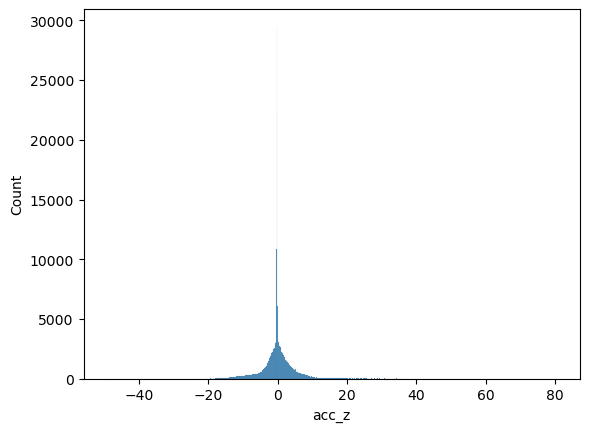

In [10]:
sns.histplot(df['acc_z'])     # Plot a histogram of 'gfc_x'
plt.show()                   # Show the plot

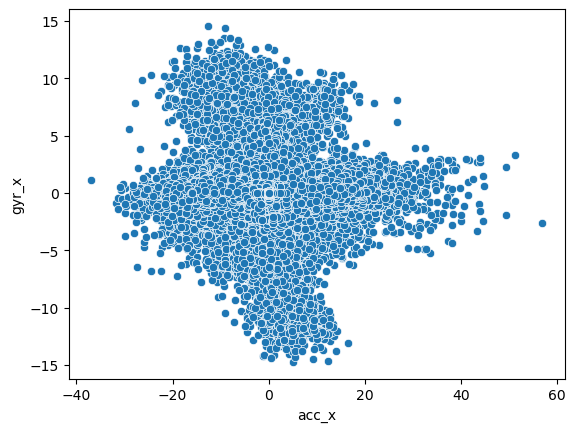

In [11]:
sns.scatterplot(x='acc_x', y='gyr_x', data=df)   # Plot a scatter plot of 'acc_x' vs 'acc_y'
plt.show()                                      # Show the plot

In [ ]:
sns.boxplot(x='label', y='gyr_z', data=df)      # Plot a box plot of 'gyr_z' grouped by 'label'
plt.show()   

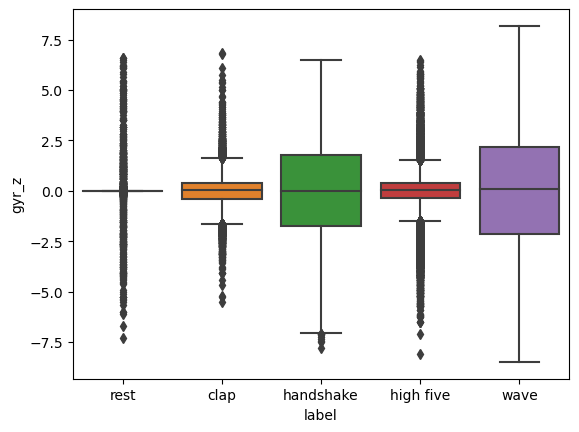

In [12]:
sns.boxplot(x='label', y='gyr_z', data=df)      # Plot a box plot of 'gyr_z' grouped by 'label'
plt.show()                                     # Show the plot


In [13]:
# df1 = df
# df1['time'] = pd.to_datetime(df1['time'])
# df1['time'] = df1['time'].dt.strftime('%H:%M:%S')
# df

,time,gfc_x,gfc_y,gfc_z,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,inc_x,inc_y,inc_z,label
0,16:44:56,0.0117,0.0169,0.9767,0.0000,0.00000,0.00000,0.025950,-0.003650,-0.130100,0.00,0.00,0.00,0.000000,0.000000,0.00000,rest
1,16:44:56,0.0117,0.0169,0.9767,0.0000,0.00000,0.00000,0.051900,-0.007300,-0.260200,176.22,78.18,-24.72,0.000000,0.000000,0.00000,rest
2,16:44:56,0.0171,0.0222,0.9760,-0.0021,-0.00270,-0.11890,0.051900,-0.007300,-0.260200,176.22,78.18,-24.72,261.352275,-0.978525,0.75285,rest
3,16:44:56,0.0171,0.0222,0.9760,-0.0042,-0.00540,-0.23780,0.051900,-0.007300,-0.260200,179.88,80.88,-28.08,348.469700,-1.304700,1.00380,rest
4,16:44:56,0.0193,0.0198,0.9762,0.0018,-0.01195,-0.23660,0.036475,-0.007625,-0.196225,179.88,80.88,-28.08,318.916325,-1.257000,1.04580,rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294694,18:23:09,0.0191,0.0205,0.9872,0.0507,0.02490,-0.12920,-0.002100,0.002150,-0.002750,192.30,66.60,8.88,189.549100,-1.029700,0.79500,rest
294695,18:23:09,0.0166,0.0244,0.9772,0.0381,0.04305,-0.17825,0.000175,0.015400,-0.002400,192.30,66.60,8.88,189.553750,-1.038250,0.80055,rest
294696,18:23:09,0.0166,0.0244,0.9772,0.0255,0.06120,-0.22730,-0.000600,0.011600,-0.001200,192.06,66.84,8.64,189.555300,-1.041100,0.80240,rest
294697,18:23:09,0.0188,0.0132,0.9887,0.0380,0.00625,-0.17105,-0.006700,-0.028700,-0.000300,192.06,66.84,8.64,189.557325,-1.040350,0.78710,rest


In [5]:
df = df.dropna()

In [67]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_data(df, acc=None, gyr=None, mag=None, inc=None, gfc=None, label=None, title=None):
    # Convert the 'time' column to datetime type
    df['time'] = pd.to_datetime(df['time'])

    # Determine the number of subplots based on the provided parameters
    num_subplots = sum(param is not None for param in [acc, gyr, mag, inc, gfc, label])

    # Create subplots
    fig, axs = plt.subplots(num_subplots, 1, figsize=(6, 2 * num_subplots), sharex=True)

    # Set the title based on the variable name
    if title is not None:
        fig.suptitle(title)

    # Track the current subplot index
    subplot_index = 0
    alpha = 0.8
    # Plot the sensor data
    if acc is not None:
        axs[subplot_index].plot(df['time'], df['acc_x'], label='acc_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['acc_y'], label='acc_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['acc_z'], label='acc_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Acceleration')
        axs[subplot_index].legend()
        subplot_index += 1

    if gyr is not None:
        axs[subplot_index].plot(df['time'], df['gyr_x'], label='gyr_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gyr_y'], label='gyr_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gyr_z'], label='gyr_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Angular Velocity')
        axs[subplot_index].legend()
        subplot_index += 1
        
    if gfc is not None:
        axs[subplot_index].plot(df['time'], df['gfc_x'], label='gfc_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gfc_y'], label='gfc_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['gfc_z'], label='gfc_z', alpha=alpha)
        axs[subplot_index].set_ylabel('G-Force')
        axs[subplot_index].legend()
        subplot_index += 1

    if inc is not None:
        axs[subplot_index].plot(df['time'], df['inc_x'], label='inc_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['inc_y'], label='inc_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['inc_z'], label='inc_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Inclination')
        axs[subplot_index].legend()
        subplot_index += 1
        
    if mag is not None:
        axs[subplot_index].plot(df['time'], df['mag_x'], label='mag_x', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['mag_y'], label='mag_y', alpha=alpha)
        axs[subplot_index].plot(df['time'], df['mag_z'], label='mag_z', alpha=alpha)
        axs[subplot_index].set_ylabel('Magnetic Field')
        axs[subplot_index].legend()
        subplot_index += 1

    if label is not None:
        # Convert the 'label' column to strings for plotting
        df['label'] = df['label'].astype(str)
        unique_labels = df['label'].unique()  # Get unique labels
        symbols = ['o', 's', '^', 'D', 'v']  # List of symbols to use
        y_value = 0.5  # Desired y-value for most symbols
        o_y_value = 0.3  # Desired y-value for the 'o' symbol

        for label, symbol in zip(unique_labels, symbols):
            label_data = df[df['label'] == label]
            x_values = label_data['time']
            y_values = [y_value] * len(label_data)  # Set y-value for most symbols

            if symbol == 'o':
                y_values = [o_y_value] * len(label_data)  # Set y-value for 'o' symbol

            axs[subplot_index].scatter(x_values, y_values, marker=symbol, label=label, alpha=alpha)

        axs[subplot_index].set_yticks([y_value, o_y_value])  # Set y-axis ticks at desired y-values
        axs[subplot_index].set_yticklabels(['', 'o'])  # Set y-axis tick labels
        axs[subplot_index].set_ylabel('')  # Remove y-axis label
        axs[subplot_index].legend()


    # Make sure we get a nice figure with only a single x-axis and labels there.
    plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
    plt.xlabel('time')

    # Format x-axis tick labels to display only hours, minutes, and seconds
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    plt.gcf().autofmt_xdate()

    # Adjust rotation of x-axis tick labels and move them a bit to the right
    plt.xticks(rotation=0, ha='center')

    # Adjust the padding between the x-axis tick labels and the plot
    plt.gca().tick_params(axis='x', pad=4)


    # Adjust the layout
    fig.tight_layout()

    # Show the plot
    plt.show()


# Example usage
# plot_data(df, acc=1, gyr=2, mag=3, inc=4, gfc=5, label=6 ,title="Row Data")


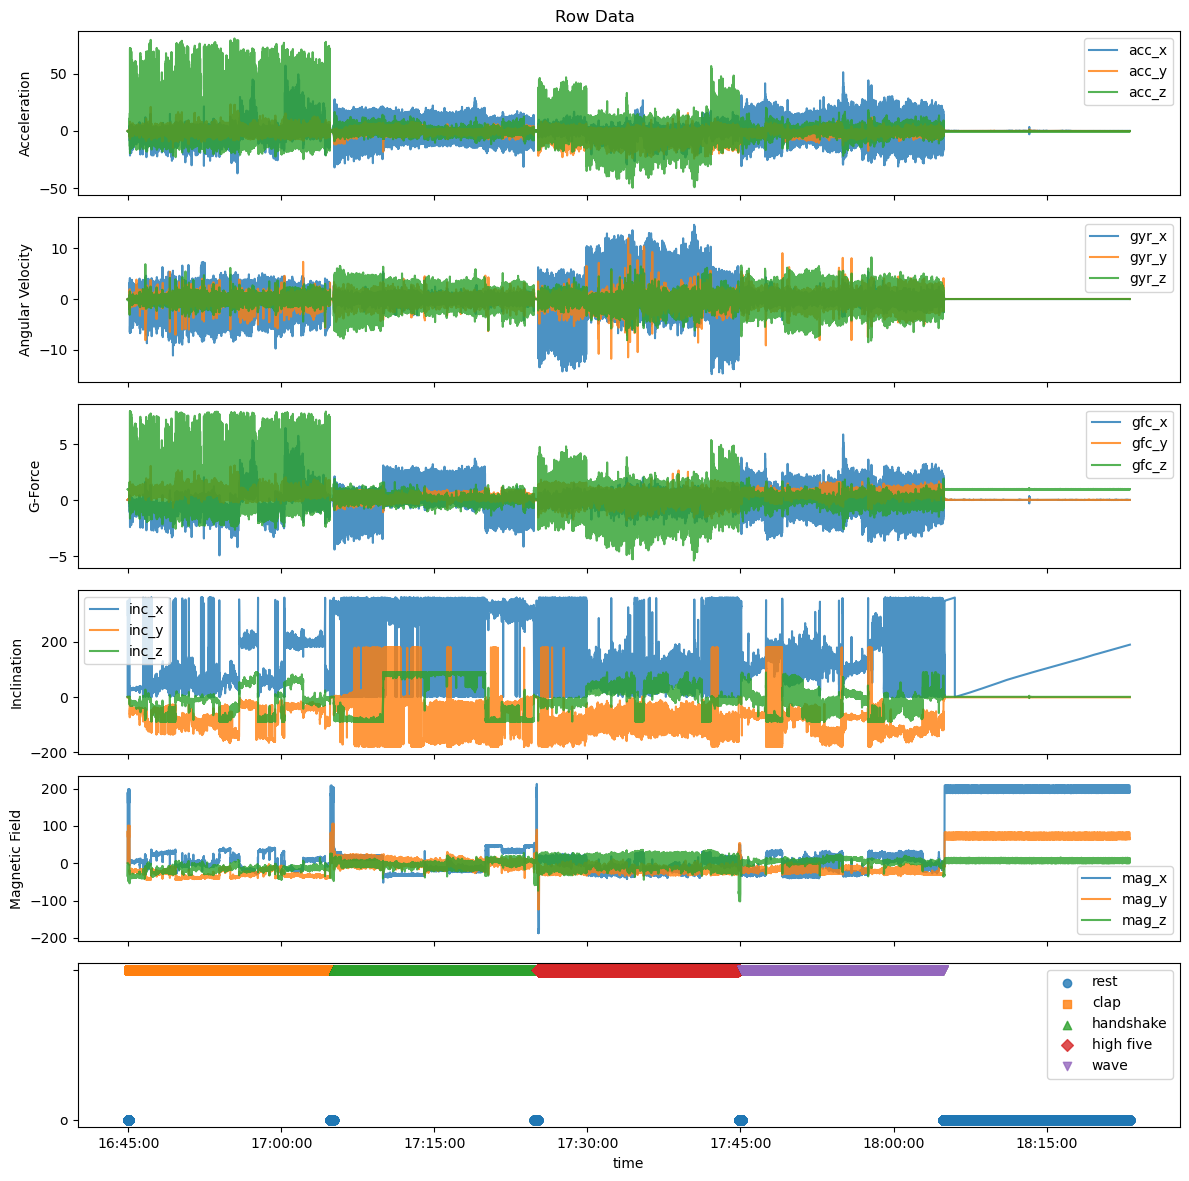

In [66]:
plot_data(df, acc=1, gyr=2, mag=3, inc=4, gfc=5, label=6 ,title="Row Data")


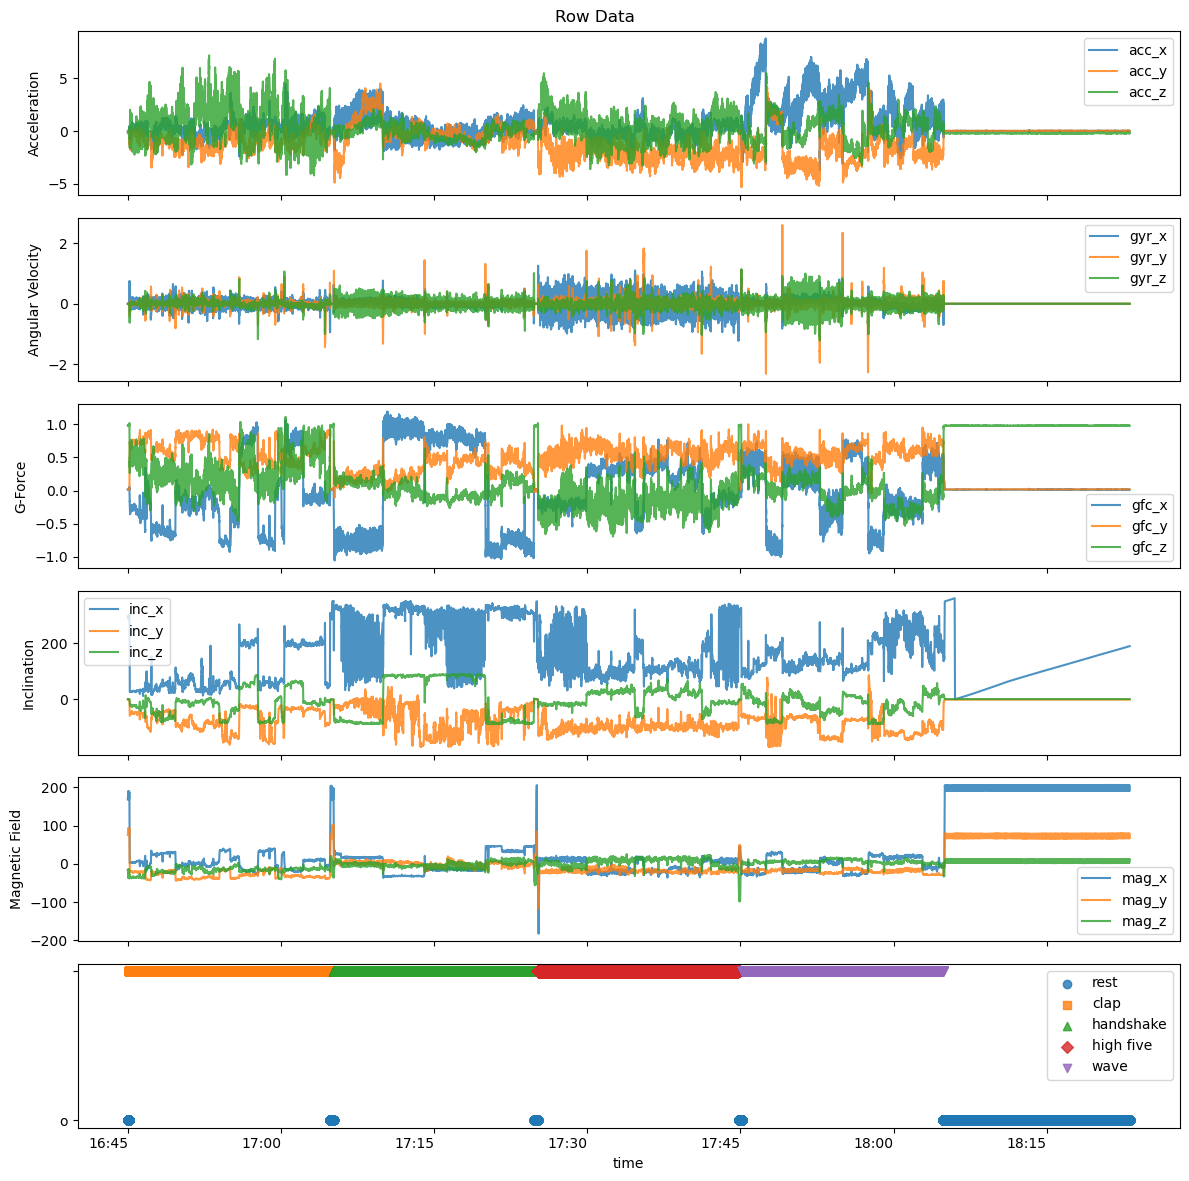

In [58]:
# Applying Moving Average smoothing with a window size of 3
import pandas as pd

def smooth_dataframe(df, window_size):
    smoothed_df = df.copy()  # Create a copy of the original DataFrame
    
    for column in df.columns:
        if column not in ['time', 'label']:
            smoothed_df[column] = df[column].rolling(window=window_size, center=True).mean()
    
    return smoothed_df

window_size = 100  # Adjust the window size as per your requirement
smoothed_data = smooth_dataframe(df, window_size)

plot_data(smoothed_data, acc=1, gyr=2, mag=3, inc=4, gfc=5, label=6 ,title="Row Data")


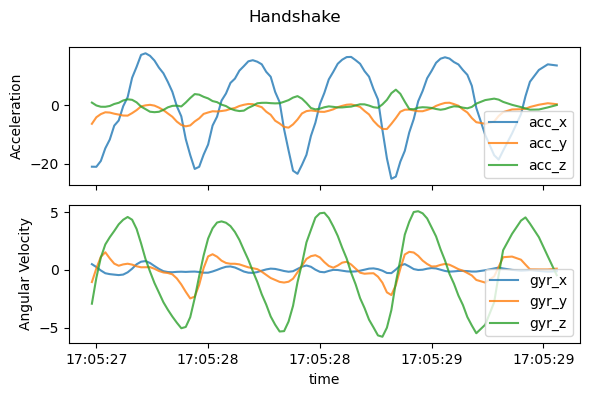

In [68]:
handshake = df[df['label']=='handshake']
window_size=3
plot_data(smooth_dataframe(handshake[1000:1100], window_size),acc=1 ,gyr=2,title='Handshake')


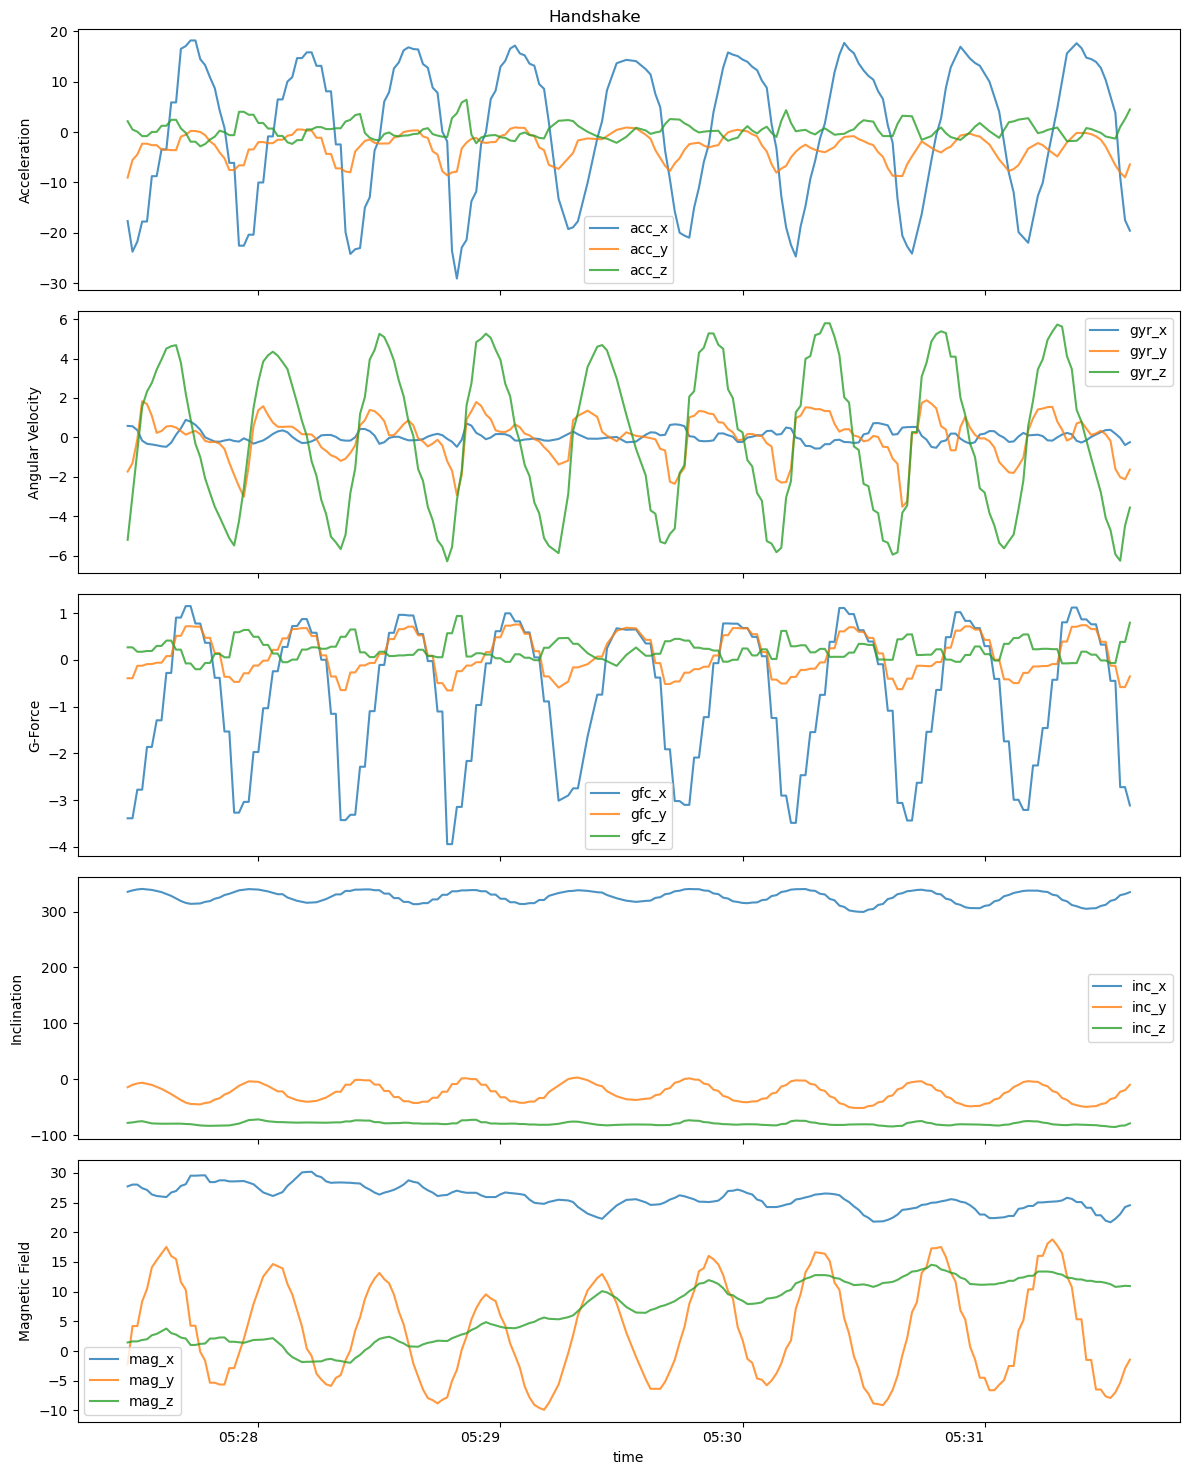

In [31]:
handshake = df[df['label']=='handshake']
plot_data(handshake[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='Handshake')


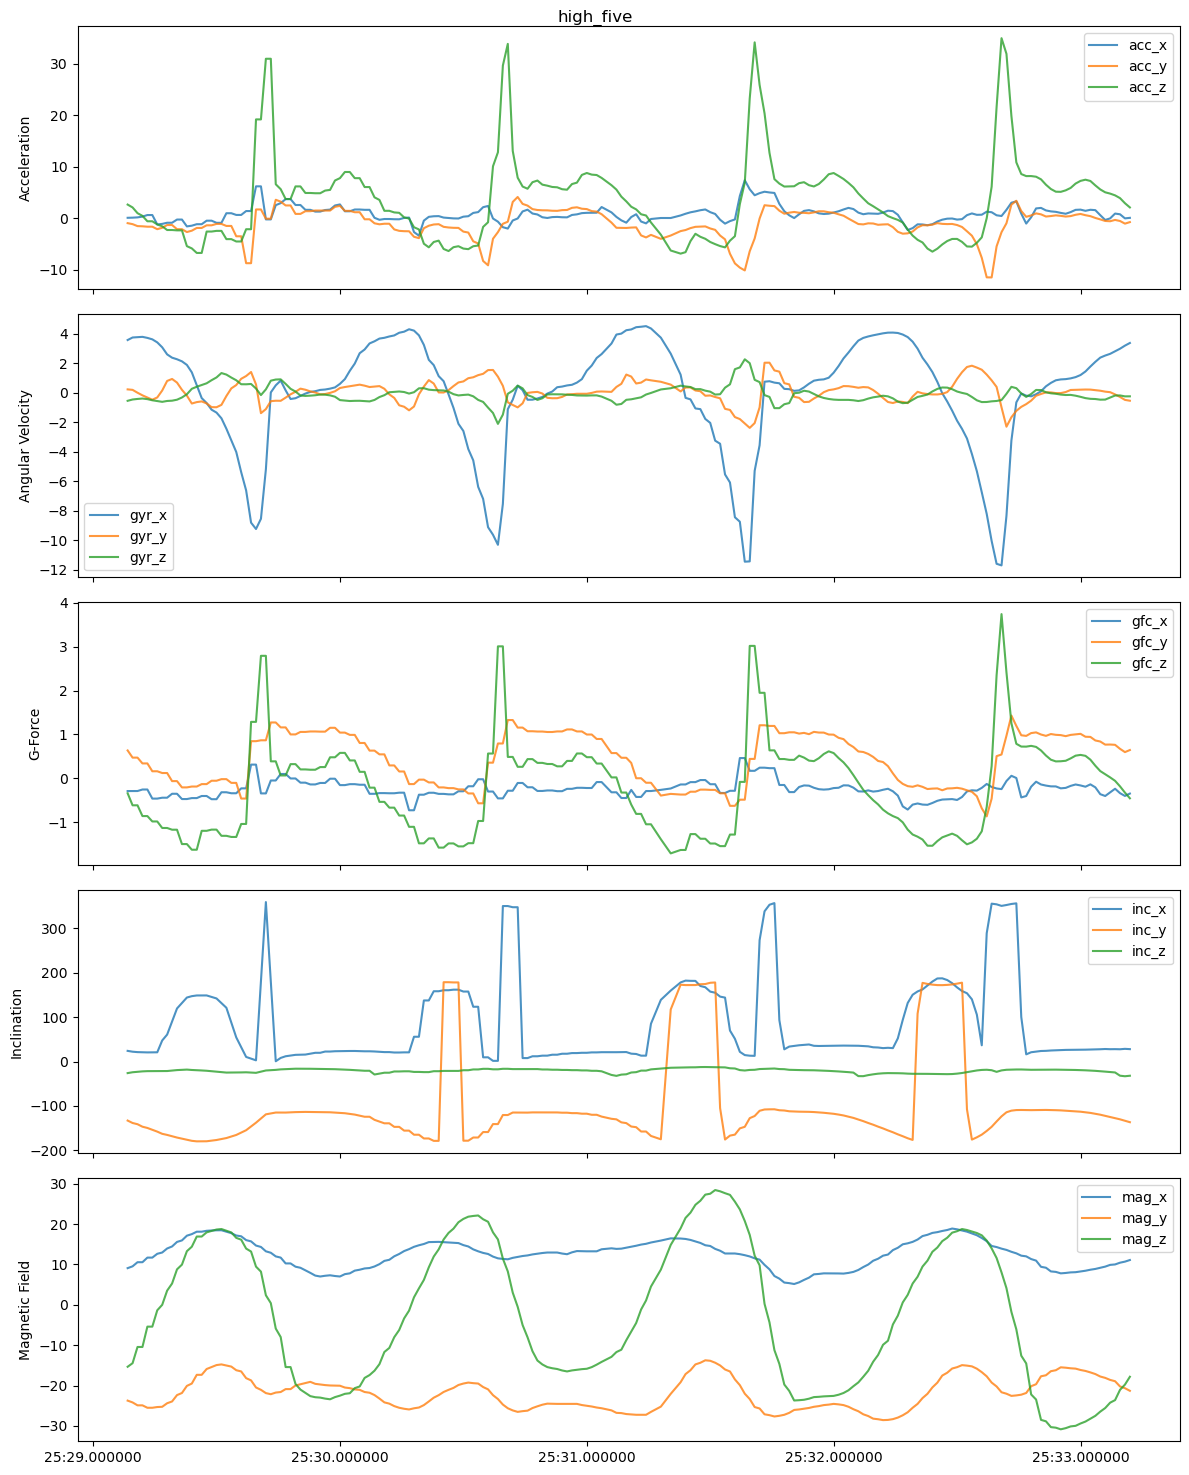

In [9]:
high_five = df[df['label']=='high five']
plot_data(high_five[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title="high_five")


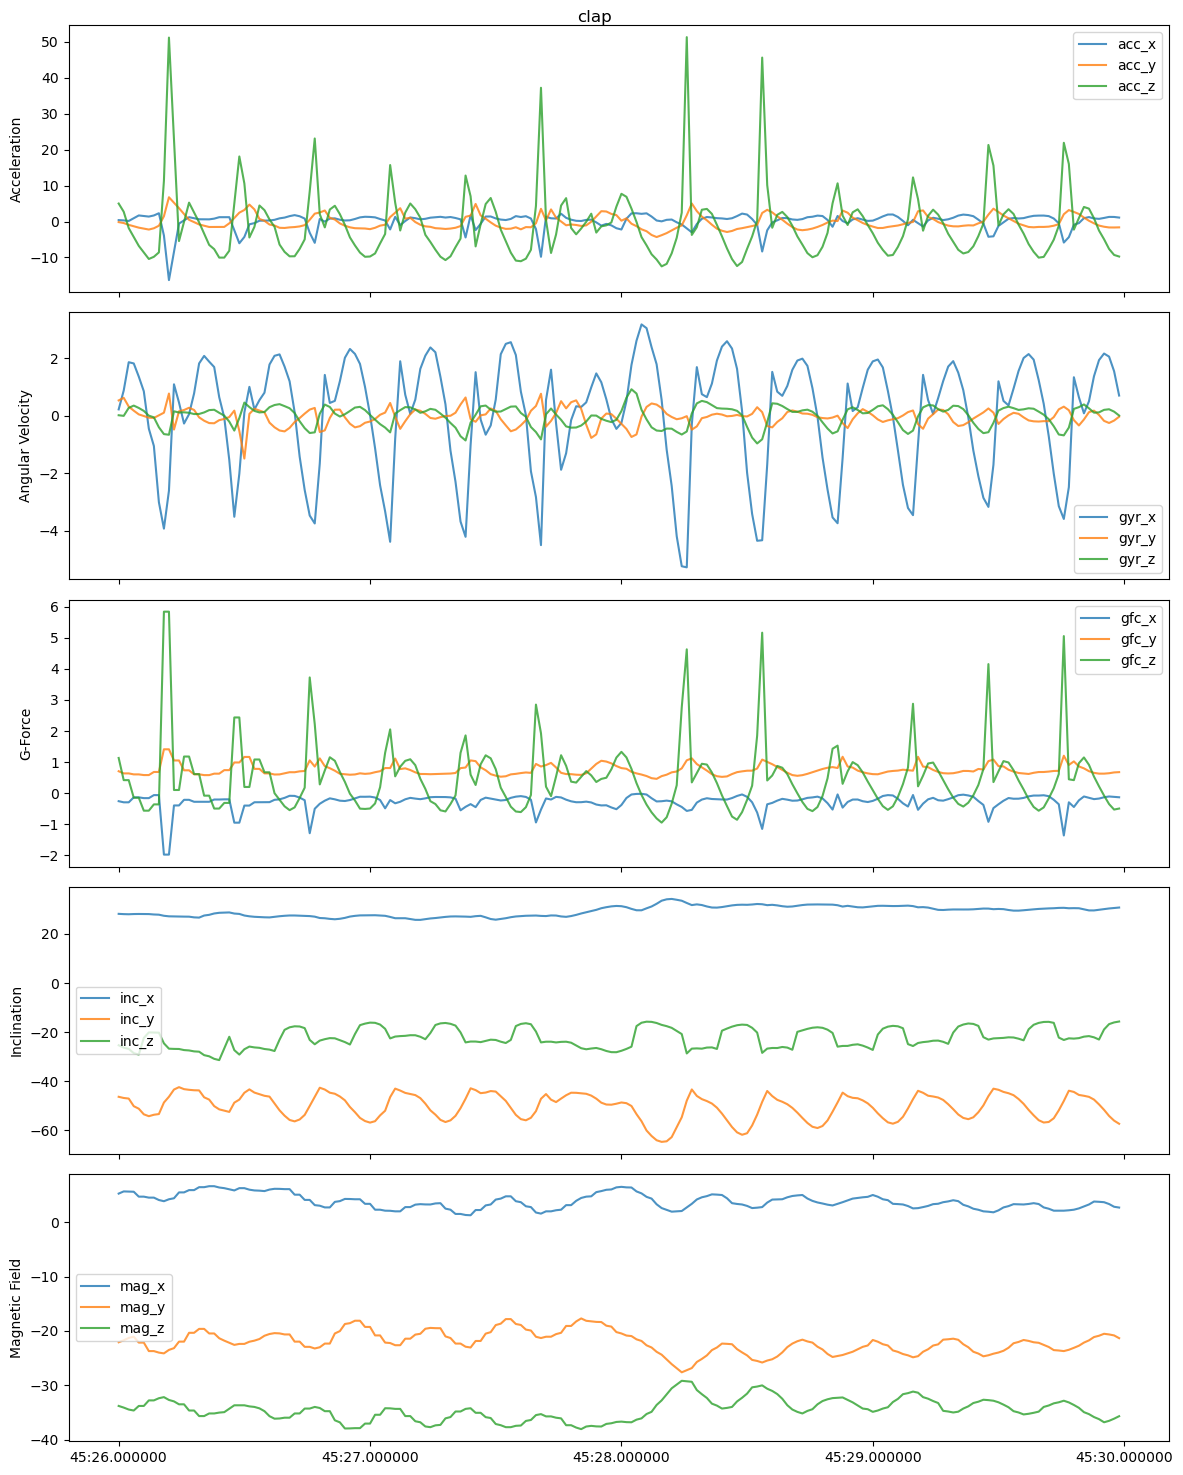

In [10]:
clap = df[df['label']=='clap']
plot_data(clap[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='clap')


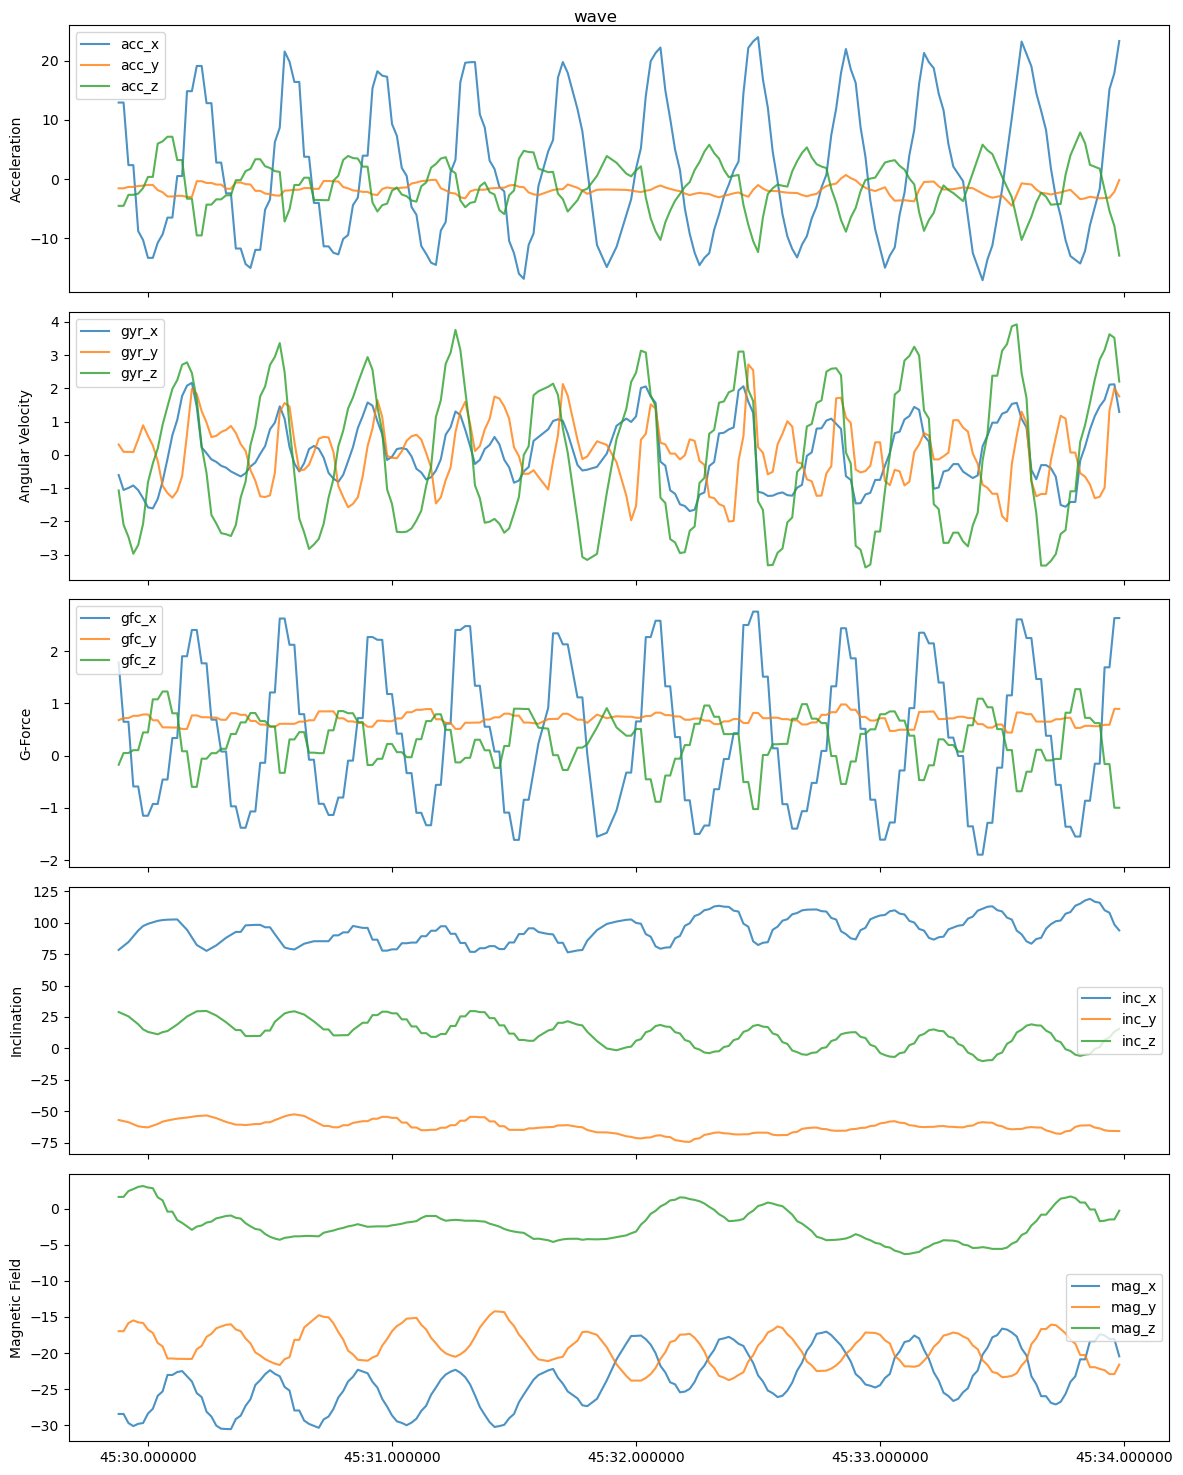

In [11]:
wave = df[df['label']=='wave']
plot_data(wave[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='wave')


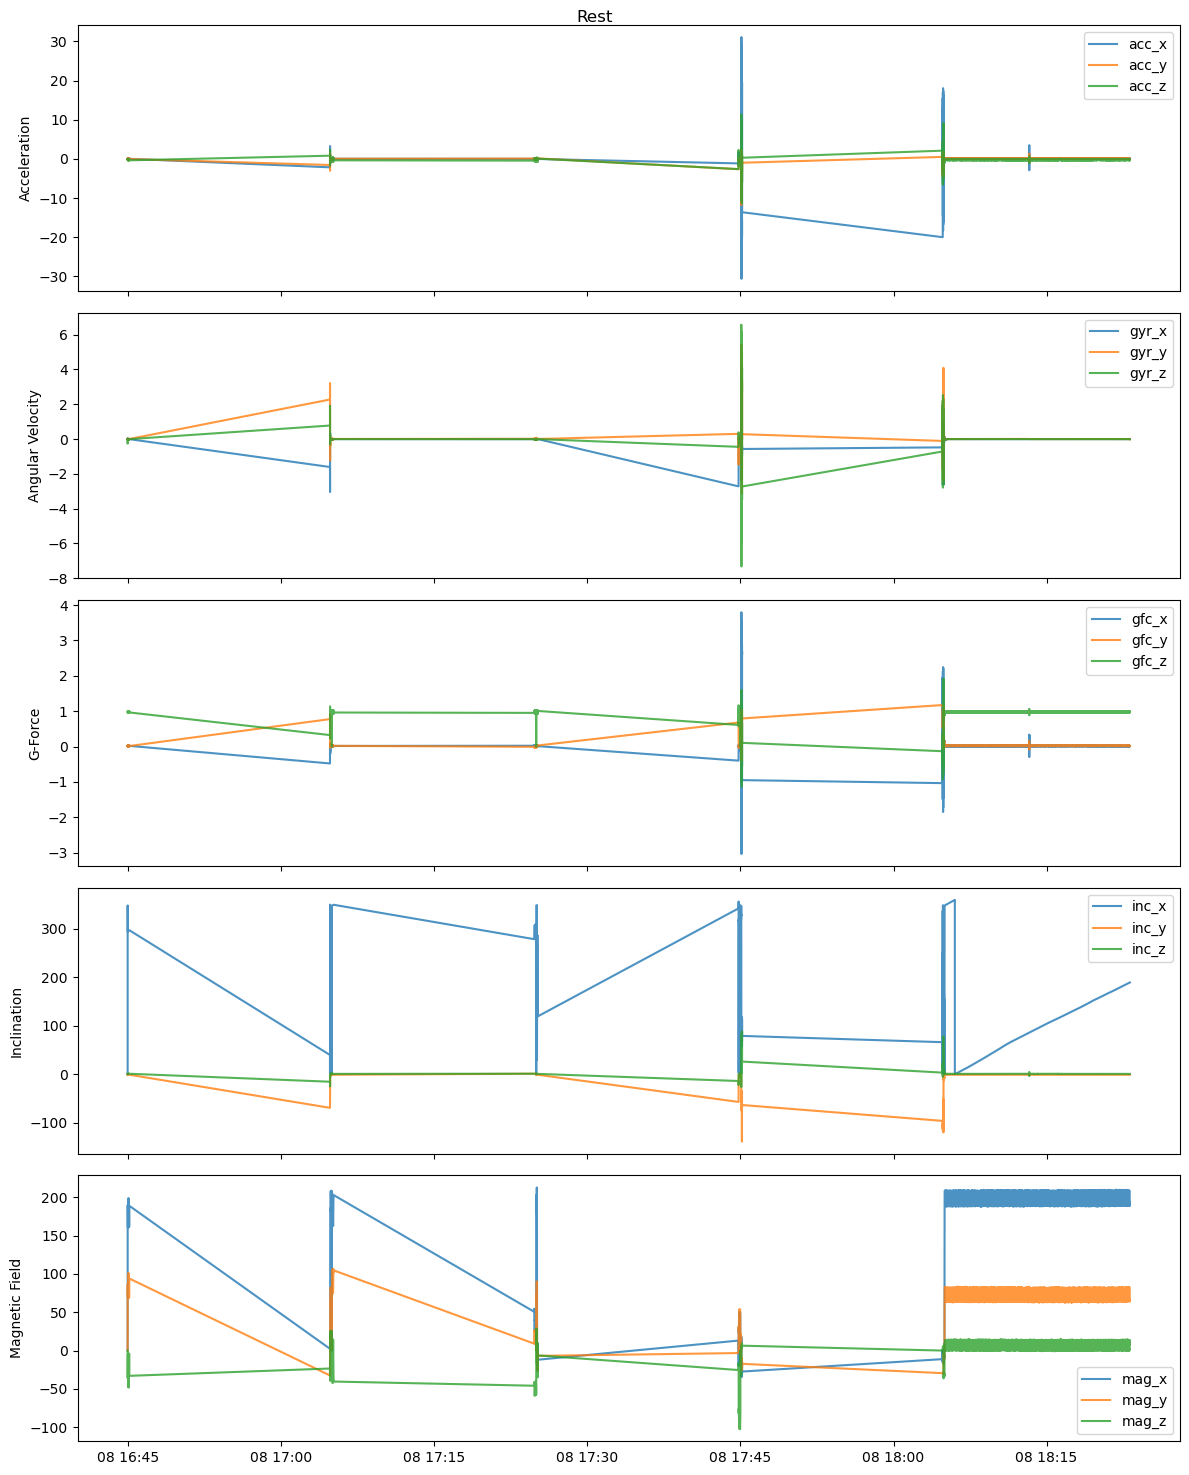

In [12]:
rest = df[df['label']=='rest']
plot_data(rest,acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='Rest')

In [ ]:
df['label'].unique()

In [ ]:
from scipy.signal import savgol_filter

# plot_data(wave[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='wave')



# Sort the DataFrame by the time column (if not already sorted)
df1 = wave.sort_values('time')

# Apply the Savitzky-Golay filter to smooth the accelerometer data
window_length = 7  # Adjust this parameter to change the smoothing effect
poly_order = 2     # Adjust this parameter to change the polynomial order
df1['acc_x'] = savgol_filter(df1['acc_x'], window_length, poly_order)
df1['acc_y'] = savgol_filter(df1['acc_y'], window_length, poly_order)
df1['acc_z'] = savgol_filter(df1['acc_z'], window_length, poly_order)

# Print the smoothed data
plot_data(df1[1000:1200],acc=1 ,gyr=2, mag=3, inc=4, gfc=6,title='wave')


In [ ]:
def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    smoothed_signal = np.convolve(signal, window, mode='same')
    return smoothed_signal

# Example usage
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, size=len(x))  # Simulated noisy signal

window_size = 5  # Adjust the window size as needed
smoothed_y = moving_average(y, window_size)

# Plot the original and smoothed signals
plt.plot(x, y, label='Original Signal')
plt.plot(x, smoothed_y, label='Smoothed Signal')
plt.legend()
plt.show()

# Data prep

In [ ]:
aaa

In [ ]:
from scipy.stats import shapiro

def check_normality(df):
    normality_results = {}
    for column in df.columns:
        if df[column].dtype != 'object' and df[column].dtype != 'datetime64[ns]':
            _, p_value = shapiro(df[column])
            normality_results[column] = p_value
    return normality_results
normality_results = check_normality(df)
for column, p_value in normality_results.items():
    if p_value > 0.05:
        print(f"{column} is normally distributed")
    else:
        print(f"{column} is not normally distributed")


In [ ]:
df

In [ ]:
new_data = df.copy()  # Create a copy of the original DataFrame

new_data['time'] = pd.to_datetime(new_data['time'])
new_data

In [ ]:
new_data = df.copy()  # Create a copy of the original DataFrame

new_data['time'] = pd.to_datetime(new_data['time'])
new_data['date'] = new_data['time'].dt.strftime('%Y-%m-%d')
new_data['time'] = new_data['time'].dt.strftime('%H:%M:%S')

# Display the updated DataFrame
new_data.head()

In [ ]:
from scipy.signal import savgol_filter


In [ ]:
# Convert the 'time' column to datetime type
df['time'] = pd.to_datetime(df['time'])

# Set the desired time range
start_time = '16:50'
end_time = '16:50:30'

# Filter the DataFrame based on the time range
filtered_df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

# Plotting the sensor data
# fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Accelerometer data
# plt.plot(filtered_df['time'], filtered_df['acc_x'], label='acc_x')
# plt.plot(filtered_df['time'], filtered_df['acc_y'], label='acc_y')
plt.plot(filtered_df['time'], filtered_df['acc_y'], label='acc_z')

yhat = savgol_filter(filtered_df['acc_y'], 50, 2) # window size 51, polynomial order 3

plt.plot(filtered_df['time'], yhat, label='acc_x')

plt.title('Claping Acceleration')
plt.legend()

# Repeat the above steps for other sensor data if desired

plt.show()
